## Датасет взят из открытых источников
## (archive.ics.uci. edu/ml/datasets/bank+marketing)

In [ ]:
# Отключить предупреждения
import warnings
warnings.filterwarnings('ignore')
# Библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly
import plotly.graph_objs as go
from plotly.offline import *
from sklearn.tree import export_graphviz
from subprocess import call
from sklearn.model_selection import GridSearchCV
%matplotlib inline
from pylab import *
from sklearn.metrics import *
# Классификаторы
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier, plot_tree

In [5]:
# Файл df содержит датасет банка A
df = pd.read_csv('Bank-full.csv', delimiter=';')
print (
    "Клиентов: ",df.shape[0],"\n",
    "Атрибутов: ",df.shape[1],"\n"
)

df.head(5)

Клиентов:  45211 
 Атрибутов:  17 



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Информация о входных данных, проверка на пустые значения и тип атрибутов, использовании памяти
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [4]:
# Количество уникальных значений каждого признака
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [3]:
# Преобразование категориальных переменных в числовые
le = LabelEncoder()
le.fit(df.marital)
df['job']=le.transform(df.marital)

le.fit(df.marital)
df['marital']=le.transform(df.marital)

le.fit(df.education)
df['education']=le.transform(df.education)

le.fit(df.default)
df['default']=le.transform(df.default)

le.fit(df.housing)
df['housing']=le.transform(df.housing)

le.fit(df.loan)
df['loan']=le.transform(df.loan)

le.fit(df.poutcome)
df['poutcome']=le.transform(df.poutcome)

le.fit(df.contact)
df['contact']=le.transform(df.contact)

le.fit(df.month)
df['month']=le.transform(df.month)

le.fit(df.y)
df['y']=le.transform(df.y)
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,2,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,1,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,2,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


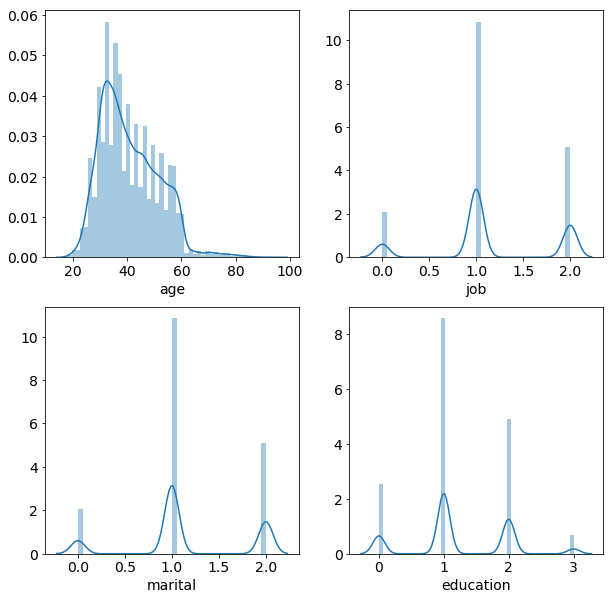

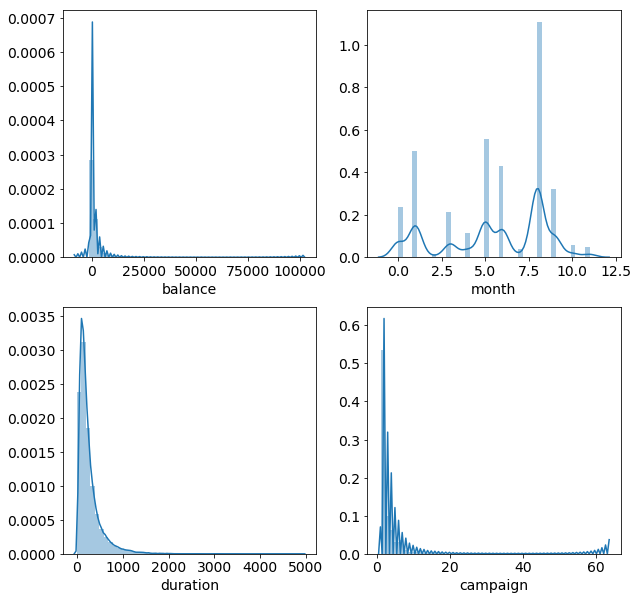

In [4]:
# Графики признаков
plt.rcParams['font.size'] = 14.0
figure, location = plt.subplots(2, 2, figsize=(10, 10))
sns.distplot(df[df.columns[0]], ax=location[0][0])
sns.distplot(df[df.columns[1]], ax=location[0][1])
sns.distplot(df[df.columns[2]], ax=location[1][0])
sns.distplot(df[df.columns[3]], ax=location[1][1])
figure, location = plt.subplots(2, 2, figsize=(10, 10))
sns.distplot(df[df.columns[5]], ax=location[0][0])
sns.distplot(df[df.columns[10]], ax=location[0][1])
sns.distplot(df[df.columns[11]], ax=location[1][0])
sns.distplot(df[df.columns[12]], ax=location[1][1])

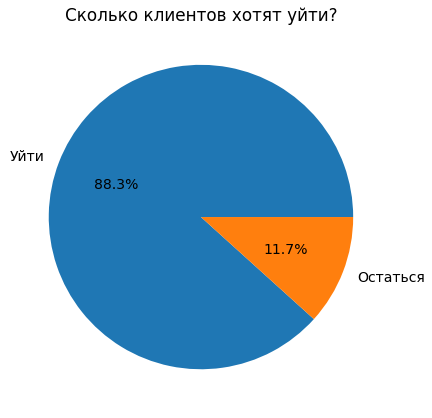

In [34]:
# Круговая диаграмма лояльности клиентов банка
figure, location = plt.subplots(figsize=(7, 7))
labels = ['Уйти', 'Остаться']
sizes = [1-df['y'].mean(axis=0), df['y'].mean(axis=0)]
plt.title("Сколько клиентов хотят уйти?")
location.pie(sizes, labels=labels, autopct='%.1f%%')
plt.show()

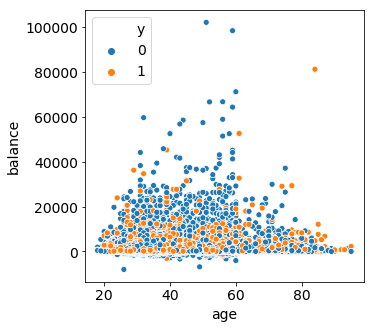

In [8]:
# Лояльность клиентов в зависимости от признаков
_, ax =  plt.subplots(2, 2, figsize=(10,10))
sns.swarmplot(x = "marital", y = "age", hue="y", sizes = (20, 20), data = df[:], ax=ax[0][0])
sns.swarmplot(x = "education", y = "age", hue = "y", sizes = (20, 20), data = df[:], ax=ax[0][1])

sns.scatterplot(x = "age", y = "duration", hue="y",sizes = (20, 20), data = df[:], ax=ax[1][0])
sns.scatterplot(x = "age", y = "balance", hue = "y", sizes = (20, 20), data = df[:], ax=ax[1][1])

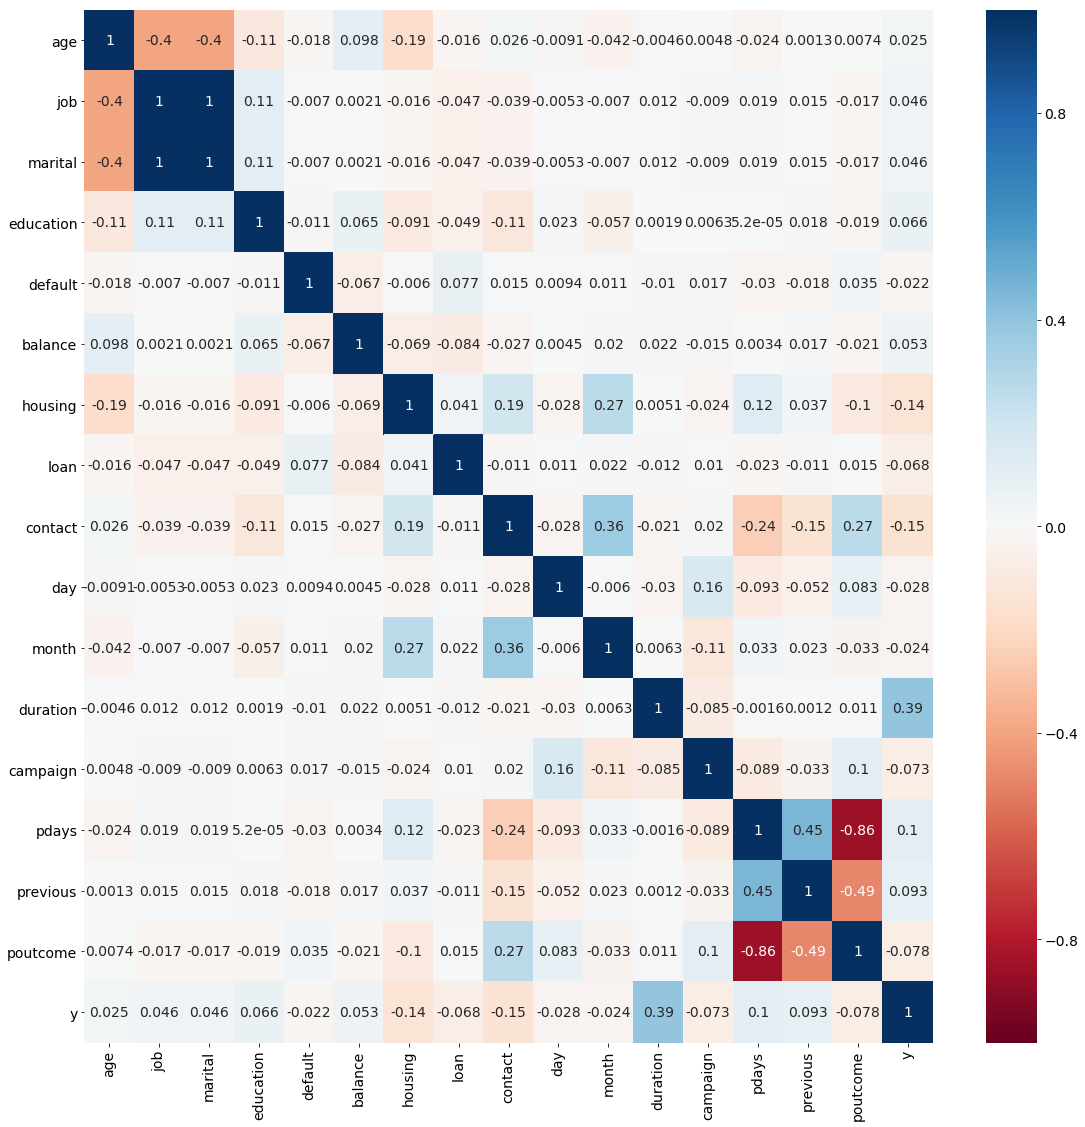

In [22]:
# Матрица корреляции
plt.subplots(figsize=(19,19))
sns.heatmap(df.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='RdBu')

In [25]:
# Средние значения для клиентов, которые не ушли (1) и ушли (0)
print(round(df[df['y'] == 1].mean(),2), "\n\n",
      round(df[df['y'] == 0].mean(),2)
     )

age            41.67
job             1.24
marital         1.24
education       1.36
default         0.01
balance      1804.27
housing         0.37
loan            0.09
contact         0.27
day            15.16
month           5.32
duration      537.29
campaign        2.14
pdays          68.70
previous        1.17
poutcome        2.35
y               1.00
dtype: float64 

 age            40.84
job             1.16
marital         1.16
education       1.21
default         0.02
balance      1303.71
housing         0.58
loan            0.17
contact         0.69
day            15.89
month           5.55
duration      221.18
campaign        2.85
pdays          36.42
previous        0.50
poutcome        2.59
y               0.00
dtype: float64


In [38]:
# Лепестковая диаграмма
data_row = [
    go.Scatterpolar(
      r = [df.age[df['y'] == 1].mean()/(df.age[df['y'] == 1].mean() + df.age[df['y'] == 0].mean()),
           df.job[df['y'] == 1].mean()/(df.job[df['y'] == 1].mean()+ df.job[df['y'] == 0].mean()),
           df.marital[df['y'] == 1].mean()/(df.marital[df['y'] == 1].mean() + df.marital[df['y'] == 0].mean()),
           df.education[df['y'] == 1].mean()/(df.education[df['y'] == 1].mean()+df.education[df['y'] == 0].mean()),
           df.default[df['y'] == 1].mean()/(df.default[df['y'] == 1].mean()+df.default[df['y'] == 0].mean()),
           df.balance[df['y'] == 1].mean()/(df.balance[df['y'] == 1].mean() + df.balance[df['y'] == 0].mean()),
           df.housing[df['y'] == 1].mean()/(df.housing[df['y'] == 1].mean() + df.housing[df['y'] == 0].mean()),
           df.loan[df['y'] == 1].mean()/(df.loan[df['y'] == 1].mean() + df.loan[df['y'] == 0].mean()),
           df.contact[df['y'] == 1].mean()/(df.contact[df['y'] == 1].mean()+ df.contact[df['y'] == 0].mean()),
           df.day[df['y'] == 1].mean()/(df.day[df['y'] == 1].mean() + df.day[df['y'] == 0].mean()),
           df.month[df['y'] == 1].mean()/(df.month[df['y'] == 1].mean() + df.month[df['y'] == 0].mean()),
           df.duration[df['y'] == 1].mean()/(df.duration[df['y'] == 1].mean() + df.duration[df['y'] == 0].mean()),
           df.campaign[df['y'] == 1].mean()/(df.campaign[df['y'] == 1].mean() + df.campaign[df['y'] == 0].mean()),
           df.pdays[df['y'] == 1].mean()/(df.pdays[df['y'] == 1].mean() + df.pdays[df['y'] == 0].mean()),
           df.previous[df['y'] == 1].mean()/(df.previous[df['y'] == 1].mean() + df.previous[df['y'] == 0].mean()),
           df.poutcome[df['y'] == 1].mean()/(df.poutcome[df['y'] == 1].mean() + df.poutcome[df['y'] == 0].mean())],
      
        theta = [df.columns[0],df.columns[1],df.columns[2], df.columns[3],df.columns[4],df.columns[5],df.columns[6],df.columns[7],df.columns[8],df.columns[9],df.columns[10],df.columns[11],df.columns[12],df.columns[13],df.columns[14],df.columns[15]],
      fill = 'toself',
      name = 'Клиент остался',
        line =  dict(
            color = 'green'
        )
    ),
    go.Scatterpolar(
      r = [df.age[df['y'] == 0].mean()/(df.age[df['y'] == 1].mean() + df.age[df['y'] == 0].mean()),
           df.job[df['y'] == 0].mean()/(df.job[df['y'] == 1].mean()+ df.job[df['y'] == 0].mean()),
           df.marital[df['y'] == 0].mean()/(df.marital[df['y'] == 1].mean() + df.marital[df['y'] == 0].mean()),
           df.education[df['y'] == 0].mean()/(df.education[df['y'] == 1].mean()+df.education[df['y'] == 0].mean()),
           df.default[df['y'] == 0].mean()/(df.default[df['y'] == 1].mean()+df.default[df['y'] == 0].mean()),
           df.balance[df['y'] == 0].mean()/(df.balance[df['y'] == 1].mean() + df.balance[df['y'] == 0].mean()),
           df.housing[df['y'] == 0].mean()/(df.housing[df['y'] == 1].mean() + df.housing[df['y'] == 0].mean()),
           df.loan[df['y'] == 0].mean()/(df.loan[df['y'] == 1].mean() + df.loan[df['y'] == 0].mean()),
           df.contact[df['y'] == 0].mean()/(df.contact[df['y'] == 1].mean()+ df.contact[df['y'] == 0].mean()),
           df.day[df['y'] == 0].mean()/(df.day[df['y'] == 1].mean() + df.day[df['y'] == 0].mean()),
           df.month[df['y'] == 0].mean()/(df.month[df['y'] == 1].mean() + df.month[df['y'] == 0].mean()),
           df.duration[df['y'] == 0].mean()/(df.duration[df['y'] == 1].mean() + df.duration[df['y'] == 0].mean()),
           df.campaign[df['y'] == 0].mean()/(df.campaign[df['y'] == 1].mean() + df.campaign[df['y'] == 0].mean()),
           df.pdays[df['y'] == 0].mean()/(df.pdays[df['y'] == 1].mean() + df.pdays[df['y'] == 0].mean()),
           df.previous[df['y'] == 0].mean()/(df.previous[df['y'] == 1].mean() + df.previous[df['y'] == 0].mean()),
           df.poutcome[df['y'] == 0].mean()/(df.poutcome[df['y'] == 1].mean() + df.poutcome[df['y'] == 0].mean())],
      theta = [df.columns[0],df.columns[1],df.columns[2], df.columns[3],df.columns[4],df.columns[5],df.columns[6],df.columns[7],df.columns[8],df.columns[9],df.columns[10],df.columns[11],df.columns[12],df.columns[13],df.columns[14],df.columns[15]],
        fill = 'toself',
      name = 'Клиент не остался',
        line =  dict(
            color = 'blue'
        )
    )
]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
        color = 'darkorange',
      visible = True,
      range = [0, 1]
    )
  ),
  showlegend = True
)

fig = go.Figure(data=data_row, layout=layout)
plotly.offline.plot(fig, filename='Bank_A.html')

'Bank_A.html'

In [8]:
# Минимальные и максимальные значения признаков в датасете
print(df.apply(np.min), "\n\n",
      df.apply(np.max)
     )

age            18
job             0
marital         0
education       0
default         0
balance     -8019
housing         0
loan            0
contact         0
day             1
month           0
duration        0
campaign        1
pdays          -1
previous        0
poutcome        0
y               0
dtype: int64 

 age              95
job               2
marital           2
education         3
default           1
balance      102127
housing           1
loan              1
contact           2
day              31
month            11
duration       4918
campaign         63
pdays           871
previous        275
poutcome          3
y                 1
dtype: int64


In [5]:
# Обучающая и тестовая выборки
df_train = df.sample(frac=2/3)
df_test = df.drop(df_train.index)
print("Обучающая выборка: ", len(df_train),"\n", "Тестовая выборка: ",len(df_test))
df.head(5)

Обучающая выборка:  30141 
 Тестовая выборка:  15070


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,1,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,2,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,1,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,2,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [6]:
# Группировка признаков по типу переменной
necateg_p = ['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']
df_train = df_train[['y'] + necateg_p]
df_train.head(5)

,y,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
35807,0,49,0,0,1,0,95,1,0,0,8,8,90,1,-1,0,3
31717,0,41,1,1,1,0,446,1,0,0,7,0,93,3,140,2,0
25327,0,33,1,1,1,0,328,1,0,0,18,9,160,2,182,1,0
23578,0,37,1,1,1,0,859,0,0,0,28,1,246,15,-1,0,3
9957,0,51,0,0,1,0,2717,0,0,2,9,6,559,2,-1,0,3


In [7]:
# Нормализация переменных (от 0 до 1)
minVec = df_train[necateg_p].min().copy()
maxVec = df_train[necateg_p].max().copy()
df_train[necateg_p] = (df_train[necateg_p]-minVec)/(maxVec-minVec)
df_train.head(5)

,y,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
35807,0,0.413333,0.0,0.0,0.333333,0.0,0.073666,1.0,0.0,0.0,0.233333,0.727273,0.018300,0.000000,0.000000,0.000000,1.0
31717,0,0.306667,0.5,0.5,0.333333,0.0,0.076853,1.0,0.0,0.0,0.200000,0.000000,0.018910,0.032258,0.164912,0.034483,0.0
25327,0,0.200000,0.5,0.5,0.333333,0.0,0.075781,1.0,0.0,0.0,0.566667,0.818182,0.032534,0.016129,0.214035,0.017241,0.0
23578,0,0.253333,0.5,0.5,0.333333,0.0,0.080602,0.0,0.0,0.0,0.900000,0.090909,0.050020,0.225806,0.000000,0.000000,1.0
9957,0,0.440000,0.0,0.0,0.333333,0.0,0.097471,0.0,0.0,1.0,0.266667,0.545455,0.113664,0.016129,0.000000,0.000000,1.0


In [8]:
# Функция для проверки данных
def Df_score(df_predict,df_train_Cols,minVec,maxVec):
    # Численные признаки для обучения модели
    necateg_p = ['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']
    df_predict = df_predict[['y'] + necateg_p]
    L = list(set(df_train_Cols) - set(df_predict.columns))
    for l in L:
        df_predict[str(l)] = -1        
    df_predict[necateg_p] = (df_predict[necateg_p]-minVec)/(maxVec-minVec)
    df_predict = df_predict[df_train_Cols]
    return df_predict

In [9]:
# Функция для определения оптимальных параметров и метрики
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [12]:
from time import time
# Классификатор Random Forest
parameter_grid = {
            'n_estimators': [100,200,500],
            'max_depth': [8,10,12,14]
        }
classifier1 = RandomForestClassifier() # Классификатор
# Выбор гиперапаметров
grid_searcher = GridSearchCV(classifier1, parameter_grid, verbose=0, cv=5)
start = time()
# Обучение модели
grid_searcher.fit(df_train.loc[:, df_train.columns != 'y'],df_train.y)
finish = time()
classifier1_best = grid_searcher.best_estimator_
print (best_model(grid_searcher))
print("Время работы алгоритма:", round(finish - start), "секунд")
RForest=classifier1_best

0.905145814671046
{'max_depth': 14, 'n_estimators': 500}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
None


In [16]:
y = df_train.y
X = df_train.loc[:, df_train.columns != 'y']

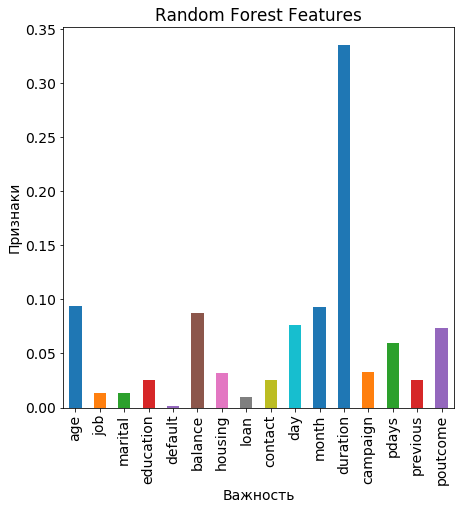

In [14]:
# График важности признаков
features_value = pd.DataFrame({'features': RForest.feature_importances_, 'value': X.columns})
features_value.plot(kind='bar', x='value', y='features', figsize=(7, 7), legend=False)
plt.title('Random Forest Features')
plt.ylabel('Признаки')
plt.xlabel('Важность')
plt.show()

In [15]:
print ("Признаки: ", RForest.feature_importances_, "\n", "Сумма: ", RForest.feature_importances_.sum())

Признаки:  [0.0943069  0.01354405 0.01365157 0.02529135 0.00185494 0.08765999
 0.03230578 0.00931171 0.02526602 0.07595952 0.09310255 0.33518561
 0.03309446 0.06010162 0.02535001 0.07401392] 
 Сумма:  1.0


In [18]:
# Метрики
print(classification_report(df_train.y,  RForest.predict(df_train.loc[:, df_train.columns != 'y'])))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     26639
           1       0.99      0.72      0.83      3502

   micro avg       0.97      0.97      0.97     30141
   macro avg       0.98      0.86      0.91     30141
weighted avg       0.97      0.97      0.96     30141



In [19]:
auc_RForest, fpr_RForest, tpr_RForest = get_auc_scores(y, RForest.predict(X),RForest.predict_proba(X)[:,1])

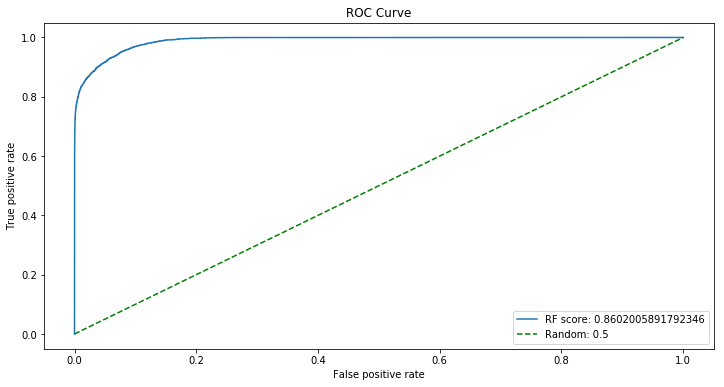

In [20]:
# AUCROC метрика
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RForest, tpr_RForest, label = 'RF score: ' + str(auc_RForest))
plt.plot([0,1], [0,1], 'g--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [16]:
# Классификатор CatBoost
parameter_grid = {
            'iterations': [100,200,500],
            'depth': [8,10,12,14],
            'verbose': [False],
            }
CTB = CatBoostClassifier(learning_rate=0.03) # Классификатор
# Выбор гиперапаметров
grid_searcher = GridSearchCV(CTB, parameter_grid, cv=5)
start = time()
# Обучение модели
grid_searcher.fit(df_train.loc[:, df_train.columns != 'y'],df_train.y)
finish = time()
CTB_best = grid_searcher.best_estimator_
print (best_model(grid_searcher))
print("Время работы алгоритма: ", round(finish - start), " секунд")
CatBoost=CTB_best

0.9064065558541522
{'depth': 10, 'iterations': 200, 'verbose': False}
None


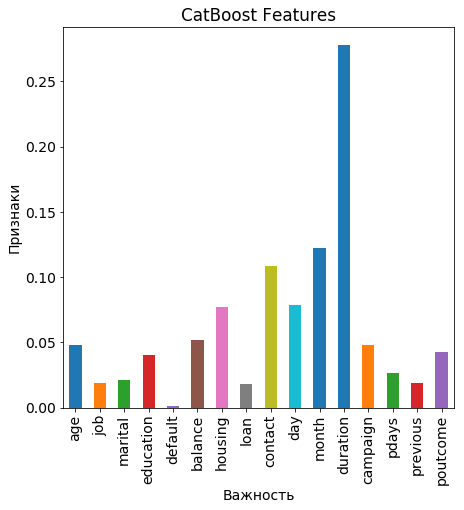

In [19]:
# График важности признаков
features_value = pd.DataFrame({'features': CatBoost.feature_importances_/100, 'value': X.columns}) #Т.к. от 0 до 1
features_value.plot(kind='bar', x='value', y='features', figsize=(7, 7), legend=False)
plt.title('CatBoost Features')
plt.ylabel('Признаки')
plt.xlabel('Важность')
plt.show()

In [23]:
print ("Признаки: ", CatBoost.feature_importances_/100, "\n", "Сумма: ", CatBoost.feature_importances_.sum()/100)

Признаки:  [0.02164074 0.00658572 0.00944642 0.01675193 0.00273533 0.03149214
 0.0613742  0.01368588 0.14793731 0.04442333 0.11577985 0.41070297
 0.03111455 0.02897902 0.01351492 0.04383566] 
 Сумма:  0.9999999999999997


In [24]:
# Метрики
print(classification_report(df_train.y,  CatBoost.predict(df_train.loc[:, df_train.columns != 'y'])))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     26639
           1       0.73      0.43      0.54      3502

   micro avg       0.92      0.92      0.92     30141
   macro avg       0.83      0.70      0.75     30141
weighted avg       0.91      0.92      0.91     30141



In [25]:
auc_CatBoost, fpr_CatBoost, tpr_CatBoost = get_auc_scores(y, CatBoost.predict(X),CatBoost.predict_proba(X)[:,1])

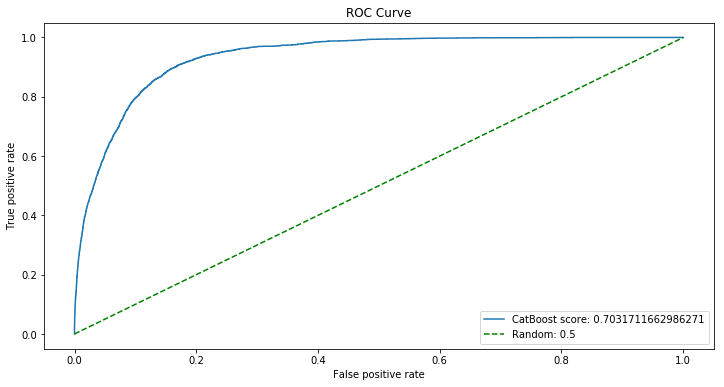

In [26]:
# AUCROC метрика
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_CatBoost, tpr_CatBoost, label = 'CatBoost score: ' + str(auc_CatBoost))
plt.plot([0,1], [0,1], 'g--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [14]:
# Классификатор XGBoost
parameter_grid = {
    'n_estimators':[100,200,500],
    'max_depth': [8,10,12,14],
        }
XGB = XGBClassifier() # Классификатор
# Выбор гиперапаметров
grid_searcher = GridSearchCV(XGB, parameter_grid, verbose=0, cv=5, refit=True)
start = time()
# Обучение модели
grid_searcher.fit(df_train.loc[:, df_train.columns != 'y'],df_train.y)
finish = time()
XGB_best = grid_searcher.best_estimator_
print (best_model(grid_searcher))
print("Время работы алгоритма: ", round(finish - start), " секунд")
XGboosting=XGB_best

0.9072691682425932
{'max_depth': 8, 'n_estimators': 100}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
None


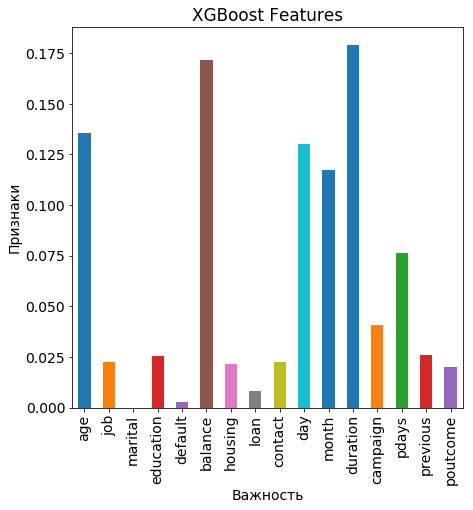

In [17]:
# График важности признаков
features_value = pd.DataFrame({'features': XGboosting.feature_importances_, 'value': X.columns})
features_value.plot(kind='bar', x='value', y='features', figsize=(7, 7), legend=False)
plt.title('XGBoost Features')
plt.ylabel('Признаки')
plt.xlabel('Важность')
plt.show()

In [29]:
print ("Признаки: ", XGboosting.feature_importances_, "\n", "Сумма: ", XGboosting.feature_importances_.sum())

Признаки:  [0.13090909 0.02334928 0.         0.02727273 0.00220096 0.16421053
 0.02019139 0.00794258 0.02038277 0.13339713 0.12861244 0.18019138
 0.0430622  0.08210526 0.02009569 0.01607656] 
 Сумма:  1.0


In [30]:
# Метрики
print(classification_report(df_train.y,  XGboosting.predict(df_train.loc[:, df_train.columns != 'y'])))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     26639
           1       0.90      0.69      0.78      3502

   micro avg       0.95      0.95      0.95     30141
   macro avg       0.93      0.84      0.88     30141
weighted avg       0.95      0.95      0.95     30141



In [31]:
auc_XGboosting, fpr_XGboosting, tpr_XGboosting = get_auc_scores(y, XGboosting.predict(X),XGboosting.predict_proba(X)[:,1])

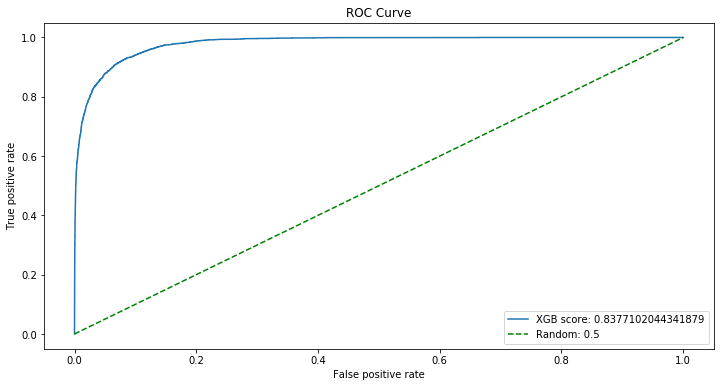

In [32]:
# AUCROC метрика
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_XGboosting, tpr_XGboosting, label = 'XGB score: ' + str(auc_XGboosting))
plt.plot([0,1], [0,1], 'g--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [33]:
# Тестовая выборка
df_test = Df_score(df_test,df_train.columns,minVec,maxVec)
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.dropna()
print (
    "Клиентов: ",df_test.shape[0],"\n",
    "Атрибутов: ",df_test.shape[1],"\n"
)

df_test.head(5)

Клиентов:  15070 
 Атрибутов:  17 



,y,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0,0.519481,0.5,0.5,0.666667,0.0,0.058389,1.0,0.0,1.0,0.133333,0.727273,0.067251,0.0,0.0,0.0,1.0
2,0,0.194805,0.5,0.5,0.333333,0.0,0.038226,1.0,1.0,1.0,0.133333,0.727273,0.019583,0.0,0.0,0.0,1.0
4,0,0.194805,1.0,1.0,1.000000,0.0,0.038217,0.0,0.0,1.0,0.133333,0.727273,0.051018,0.0,0.0,0.0,1.0
6,0,0.129870,1.0,1.0,0.666667,0.0,0.042417,1.0,1.0,1.0,0.133333,0.727273,0.055913,0.0,0.0,0.0,1.0
8,0,0.519481,0.5,0.5,0.000000,0.0,0.039347,1.0,0.0,1.0,0.133333,0.727273,0.012883,0.0,0.0,0.0,1.0


In [34]:
# Метрики
print(classification_report(df_test.y,  RForest.predict(df_test.loc[:, df_test.columns != 'y'])))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     13283
           1       0.69      0.38      0.49      1787

   micro avg       0.91      0.91      0.91     15070
   macro avg       0.80      0.68      0.72     15070
weighted avg       0.89      0.91      0.89     15070



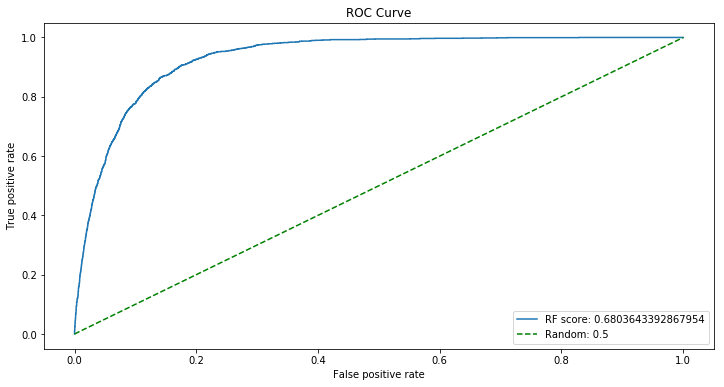

In [35]:
# AUCROC метрика
auc_RForest_test, fpr_RForest_test, tpr_RForest_test = get_auc_scores(df_test.y, RForest.predict(df_test.loc[:, df_test.columns != 'y']),
                                                       RForest.predict_proba(df_test.loc[:, df_test.columns != 'y'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RForest_test, tpr_RForest_test, label = 'RF score: ' + str(auc_RForest_test))
plt.plot([0,1], [0,1], 'g--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [36]:
# Метрика Accuracy
accuracy_score(df_test.y, RForest.predict(df_test.loc[:, df_test.columns != 'y']))

0.9061048440610484

In [38]:
# Метрики
print(classification_report(df_test.y, CatBoost.predict(df_test.loc[:, df_test.columns != 'y'])))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     13283
           1       0.69      0.38      0.49      1787

   micro avg       0.91      0.91      0.91     15070
   macro avg       0.81      0.68      0.72     15070
weighted avg       0.89      0.91      0.89     15070



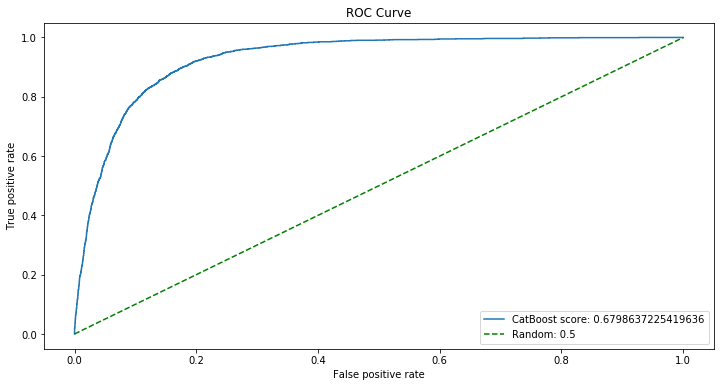

In [39]:
# AUCROC метрика
auc_CatBoost_test, fpr_CatBoost_test, tpr_CatBoost_test = get_auc_scores(df_test.y, CatBoost.predict(df_test.loc[:, df_test.columns != 'y']),
                                                       CatBoost.predict_proba(df_test.loc[:, df_test.columns != 'y'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_CatBoost_test, tpr_CatBoost_test, label = 'CatBoost score: ' + str(auc_CatBoost_test))
plt.plot([0,1], [0,1], 'g--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [40]:
# Метрика Accuracy
accuracy_score(df_test.y, CatBoost.predict(df_test.loc[:, df_test.columns != 'y']))

0.9065029860650299

In [42]:
# Метрики
print(classification_report(df_test.y,  XGboosting.predict(df_test.loc[:, df_test.columns != 'y'])))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     13283
           1       0.65      0.46      0.54      1787

   micro avg       0.91      0.91      0.91     15070
   macro avg       0.79      0.71      0.74     15070
weighted avg       0.90      0.91      0.90     15070



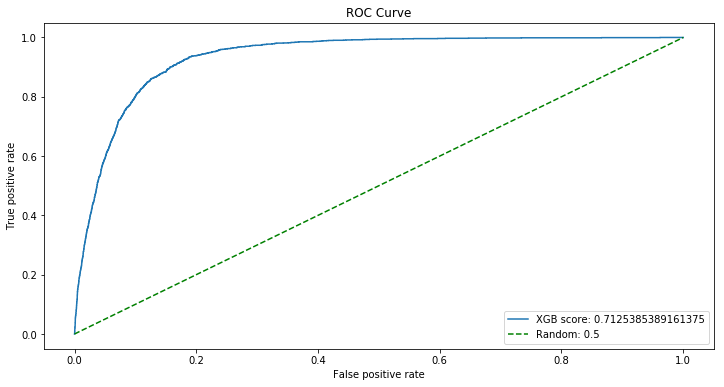

In [43]:
# AUCROC метрика
auc_XGboosting_test, fpr_XGboosting_test, tpr_XGboosting_test = get_auc_scores(df_test.y, XGboosting.predict(df_test.loc[:, df_test.columns != 'y']),
                                                       XGboosting.predict_proba(df_test.loc[:, df_test.columns != 'y'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_XGboosting_test, tpr_XGboosting_test, label = 'XGB score: ' + str(auc_XGboosting_test))
plt.plot([0,1], [0,1], 'g--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [44]:
# Метрика Accuracy
accuracy_score(df_test.y, XGboosting.predict(df_test.loc[:, df_test.columns != 'y']))

0.9069011280690112

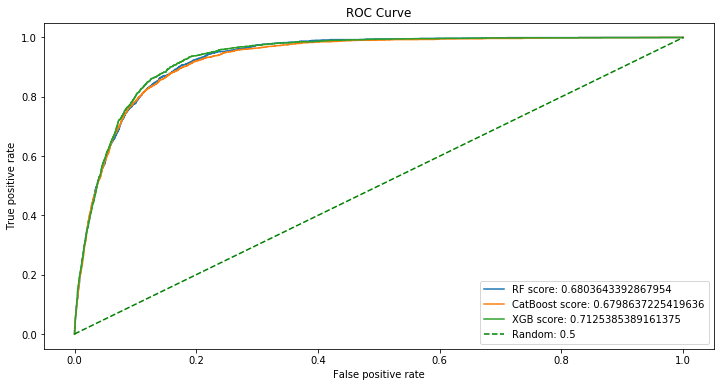

In [57]:
# Сравнение результатов работы программы
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RForest_test, tpr_RForest_test, label = 'RF score: ' + str(auc_RForest_test))
plt.plot(fpr_CatBoost_test, tpr_CatBoost_test, label = 'CatBoost score: ' + str(auc_CatBoost_test))
plt.plot(fpr_XGboosting_test, tpr_XGboosting_test, label = 'XGB score: ' + str(auc_XGboosting_test))
plt.plot([0,1], [0,1], 'g--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [47]:
# Вывод результатов в 2 столбца
def print2 ( *args ):
    num = len(args)
    x = 0
    while x < num:
        try:
            print(str(int(args[x])) + " " + str(int(args[x + 1])))
        except:
            print(str(int(args[x])))
        x += 2

In [49]:
# Экспорт в txt
import sys
sys.stdout = open('Bank_A_RF.txt', 'w')
print2(*df_test.y[:], *RForest.predict(df_test.loc[:, df_test.columns != 'y'][:]))
sys.stdout.close()

In [50]:
# Экспорт в txt
sys.stdout = open('Bank_A_CB.txt', 'w')
print2(*df_test.y[:], *CatBoost.predict(df_test.loc[:, df_test.columns != 'y'][:]))
sys.stdout.close()

In [51]:
# Экспорт в txt
sys.stdout = open('Bank_A_XGB.txt', 'w')
print2(*df_test.y[:], *XGboosting.predict(df_test.loc[:, df_test.columns != 'y'][:]))
sys.stdout.close()